In [1]:
import os
import pandas as pd
import json
import re

Visualisando os dados em JSON

In [3]:
import pandas as pd

caminho = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\meios_pagamentos_mensal\data\meios_pagamentos.json"
df = pd.read_json(caminho)
print(df.head())



                                      @odata.context  \
0  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
1  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
2  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
3  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
4  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   

                                               value  
0  {'AnoMes': '202507', 'quantidadePix': 6698196....  
1  {'AnoMes': '202506', 'quantidadePix': 6464330....  
2  {'AnoMes': '202505', 'quantidadePix': 6643181....  
3  {'AnoMes': '202504', 'quantidadePix': 6278102....  
4  {'AnoMes': '202503', 'quantidadePix': 6249384....  


Transforme o arquivo json em dataframe

In [4]:
import pandas as pd
import json

# Caminho para o JSON bruto
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\meios_pagamentos_mensal\data\meios_pagamentos.json"

# Ler o JSON e carregar os dados da chave 'value'
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

# Transformar o JSON em DataFrame
df = pd.DataFrame(dados["value"])

# Exibir as 5 primeiras linhas para conferência
df.head()


,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeCheque,quantidadeBoleto
0,202507,6698196.91,3497412.52,67192.89,3915166.65,8507.87,353819.55
1,202506,6464330.71,2869832.97,62477.43,3742911.28,8217.12,338127.37
2,202505,6643181.01,2822151.77,64178.98,3799492.18,8406.19,340006.42
3,202504,6278102.30,2676807.81,64449.00,3850452.25,8454.24,341624.79
4,202503,6249384.72,2570468.46,61294.83,3683199.49,8808.83,340788.00


Extrair os dados do JSON e tratar para CSV

In [5]:
# === Caminhos ===
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\meios_pagamentos_mensal\data\meios_pagamentos.json"
pasta_tratados = os.path.join(os.path.dirname(caminho_json), "..", "tratados")
os.makedirs(pasta_tratados, exist_ok=True)
caminho_csv = os.path.join(pasta_tratados, "meios_pagamentos_tratado.csv")

# === Ler JSON e acessar a chave 'value' ===
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

df = pd.DataFrame(dados["value"])  # pega somente os dados

# === Converter coluna AnoMes para datetime e ordenar ===
df["AnoMes"] = pd.to_datetime(df["AnoMes"].astype(str), format="%Y%m", errors="coerce")
df = df.sort_values("AnoMes")

# === Garantir que colunas numéricas sejam números ===
def to_num(x):
    if pd.isna(x): 
        return x
    s = str(x).strip()
    s = s.replace(".", "").replace(",", ".")          # remove separador de milhar, troca decimal vírgula por ponto
    s = re.sub(r"[^0-9\.\-]", "", s)                  # remove símbolos extras
    try:
        return float(s)
    except:
        return pd.NA

for col in df.columns:
    low = col.lower()
    if low.startswith("quantidade") or low.startswith("valor"):
        df[col] = df[col].map(to_num)

# === Salvar CSV tratado ===
df.to_csv(caminho_csv, index=False, encoding="utf-8")
print("✅ CSV tratado salvo com sucesso!")
print("📂 Local:", caminho_csv)
df.head()



✅ CSV tratado salvo com sucesso!
📂 Local: C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\meios_pagamentos_mensal\data\..\tratados\meios_pagamentos_tratado.csv


,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeCheque,quantidadeBoleto
19,2023-12-01,478375909.0,19198360.0,8020226.0,362975888.0,1124191.0,33755205.0
18,2024-01-01,435007685.0,180438292.0,7034325.0,333734485.0,1191912.0,36355032.0
17,2024-02-01,434491769.0,170393555.0,6580587.0,298122645.0,1037338.0,33226947.0
16,2024-03-01,488046105.0,192098695.0,6756505.0,333305427.0,1012246.0,33643546.0
15,2024-04-01,490046649.0,206261468.0,7064715.0,365260648.0,1117922.0,36163328.0


Lendo CSV tratado

In [7]:
df = pd.read_csv("C:/Users/victo/OneDrive/Documentos/Faculdade Senac/4 Periodo/Big Data/API/meios_pagamentos_mensal/tratados/meios_pagamentos_tratado.csv")
df["AnoMes"] = pd.to_datetime(df["AnoMes"])

df.head()


,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeCheque,quantidadeBoleto
0,2023-12-01,478375909.0,19198360.0,8020226.0,362975888.0,1124191.0,33755205.0
1,2024-01-01,435007685.0,180438292.0,7034325.0,333734485.0,1191912.0,36355032.0
2,2024-02-01,434491769.0,170393555.0,6580587.0,298122645.0,1037338.0,33226947.0
3,2024-03-01,488046105.0,192098695.0,6756505.0,333305427.0,1012246.0,33643546.0
4,2024-04-01,490046649.0,206261468.0,7064715.0,365260648.0,1117922.0,36163328.0


Evolução Mensal do Pix x TED

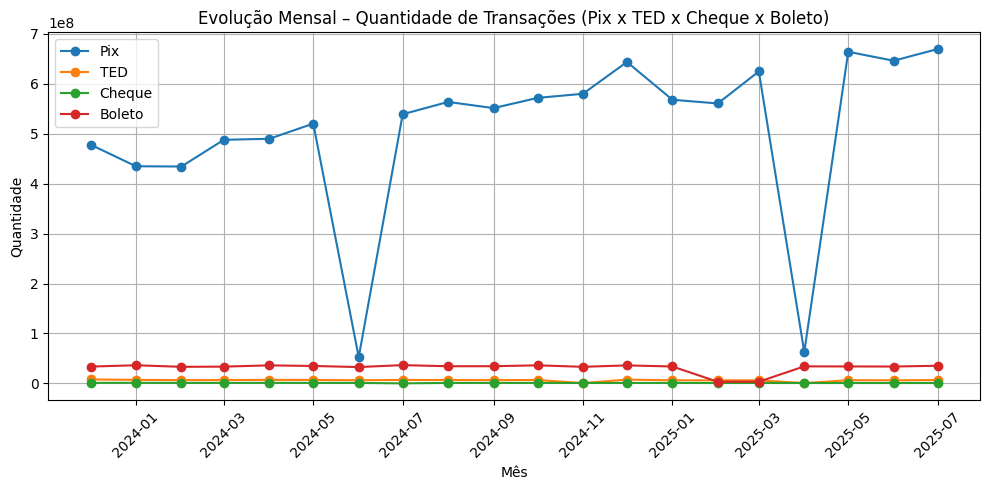

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["AnoMes"], df["quantidadePix"], marker="o", label="Pix")
plt.plot(df["AnoMes"], df["quantidadeTED"], marker="o", label="TED")
plt.plot(df["AnoMes"], df["quantidadeCheque"], marker="o", label="Cheque")
plt.plot(df["AnoMes"], df["quantidadeBoleto"], marker="o", label="Boleto")
plt.title("Evolução Mensal – Quantidade de Transações (Pix x TED x Cheque x Boleto)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Comparativo total entre os meios de pagamento

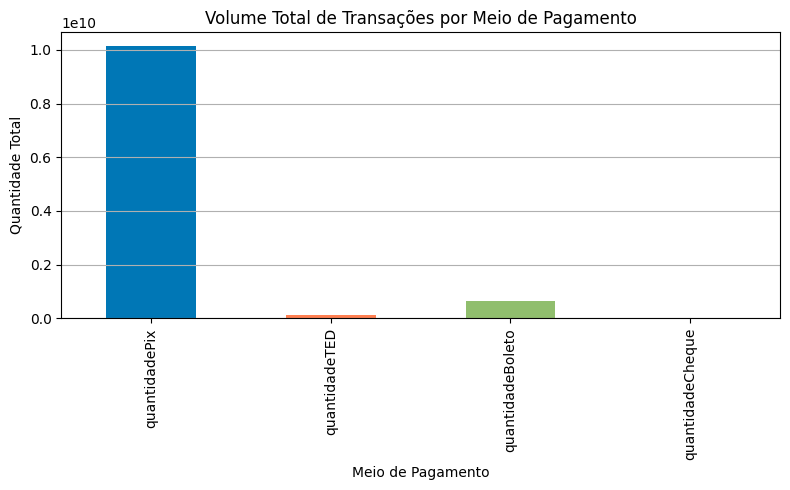

In [9]:
cols_qtd = ["quantidadePix", "quantidadeTED", "quantidadeBoleto", "quantidadeCheque"]
totais = df[cols_qtd].sum(numeric_only=True)

plt.figure(figsize=(8,5))
totais.plot(kind="bar", color=["#0077b6", "#ff7f51", "#90be6d", "#f9c74f"])
plt.title("Volume Total de Transações por Meio de Pagamento")
plt.ylabel("Quantidade Total")
plt.xlabel("Meio de Pagamento")
plt.grid(axis="y")
plt.tight_layout()
plt.show()



Percentual total por meio de pagamento

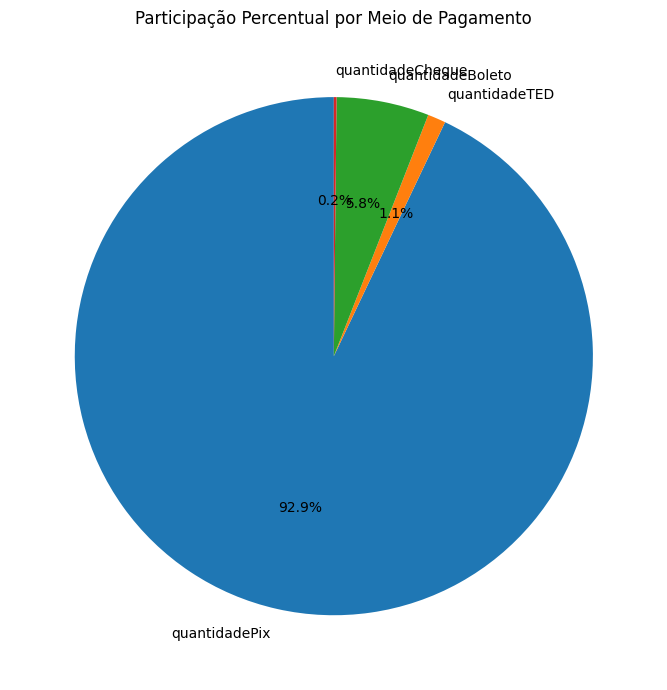

In [10]:
plt.figure(figsize=(7,7))
totais.plot(kind="pie", autopct="%1.1f%%", startangle=90, ylabel="")
plt.title("Participação Percentual por Meio de Pagamento")
plt.tight_layout()
plt.show()
